In [9]:
import matplotlib.pyplot as plt
import os
import json
import sys
from cycler import cycler
import re
from statistics import mean, median
import random

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Now processing architecture  frankencerts ...
Now processing architecture  v3 ...
Now processing architecture  v3-experiments-extra ...
Now processing architecture  v3-experiments ...
Now processing model  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1.75 ...
Code coverage for  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1.75 {'libressl': 11.4, 'openssl': 12.5, 'mbedtls': 12.2, 'gnutls': 8.8, 'matrixssl': 15.2}
Mean 12.02
Now processing model  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T3 ...
Code coverage for  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T3 {'libressl': 0, 'openssl': 0, 'mbedtls': 0, 'gnutls': 0, 'matrixssl': 0}
Mean 0
Now processing model  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1.5 ...
Code coverage for  zmap-data-1024-3-0.0002lr-0.1dropout-epoch3-step300000T1.5 {'libressl': 11.4, 'openssl': 12.5, 'mbedtls': 12.2, 'gnutls': 8.8, 'matrixssl': 15.2}
Mean 12.02
Now processing model  zmap-data-1024-3-0.0002lr-0.1dr

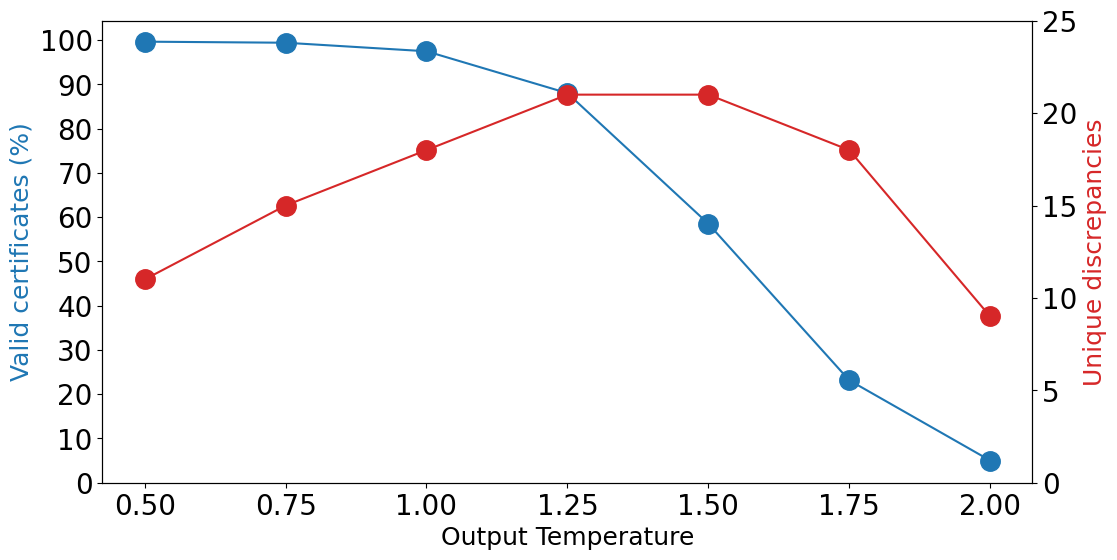

In [10]:
# Show relationship b/w no. of MLcerts with unique discrepancies found
results_dir = "/home/XYZ/docker/attached_dir/all_results/testing-results"
code_coverage_dir = "/home/XYZ/docker/attached_dir/all_results/coverage"

libraries = ["libressl", "openssl", "mbedtls", "gnutls", "matrixssl"]

# Iterate through results, ignoring 00000 or 11111, and only including discrepancies (i.e., 11011)
models_disc = {}
all_results = {}
models_code_coverage = {}
for arch_dir in os.listdir(results_dir):
    print("Now processing architecture ", arch_dir, "...")
    
    if arch_dir != "v3-experiments":
        continue

    for dir in os.listdir(results_dir + "/" + arch_dir):
        print("Now processing model ", dir, "...")
        
        if not "0T" in dir:
            continue
        
        if "-LARGE" in dir:
            continue
            
        new_name = float(dir.split("0T")[1])
            
        all_results[new_name] = []
        for f in os.listdir(results_dir + "/" + arch_dir + "/" + dir + "/json/"):
            if ".json" in f:
                with open(results_dir + "/" + arch_dir + "/" + dir + "/json/" + f) as oF:
                    data = json.load(oF)
                    this_pattern = ""
                    for elem in data:
                        this_pattern += str((int(data[elem] != 0)))
                    all_results[new_name].append(this_pattern)
        
        models_disc[new_name] = set()
        for i in range(0, len(all_results[float(dir.split("0T")[1])])):
            # We only care about outputs that indicate a discrepancy
            if (all_results[new_name][i] == '00000' or all_results[new_name][i] == '11111'):
                continue 

            if all_results[new_name][i] not in models_disc[new_name]:
                models_disc[new_name].add(all_results[new_name][i])
                
        # Now include code coverage data
        coverages = {}
        for l in libraries:
            try: 
                with open(code_coverage_dir + "/" + arch_dir + "/" + dir + "/" + l + "/lcov-results/index.html", 'r') as cF:
                    result = re.findall(r"<td class=\"headerCovTableEntryLo\">(.+) %</td>", cF.read())
                    coverages[l] = float(result[1])
            except:
                coverages[l] = 0
        
        print("Code coverage for ", dir, coverages)
        print("Mean", mean(list(coverages.values())))
        models_code_coverage[new_name] = median(list(coverages.values()))
        
    
formatted_results = {}
x = []
y1 = []
y2 = []

for m in [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]:
    x.append(m)
    y1.append((len(all_results[m])/10000)*100)
    y2.append(len(models_disc[m]))
    #y2.append(models_code_coverage[m])
print(x, y1, y2)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(x, y1, '-o', color='tab:blue', markersize=14)
ax2.plot(x, y2, '-o', color='tab:red', markersize=14)

ax1.set_xticks([0.5, 0.75, 1, 1.25, 1.5, 1.75, 2])
ax2.set_yticks([0, 5, 10, 15, 20, 25])
#ax2.set_yticks([12, 13, 14])
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

ax1.set_xlabel('Output Temperature')
ax1.set_ylabel('Valid certificates (%)', color='tab:blue')
ax2.set_ylabel('Unique discrepancies', color='tab:red')

SMALL_SIZE = 14
MEDIUM_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE-2)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE+2)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE+2)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

plt.savefig('/home/XYZ/notebook/MLcertsJupyter/Figures/samplingStrategy.pdf', bbox_inches='tight')
#plt.show()


In [12]:
for m in [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]:
    print(len(models_disc[m]))


11
15
18
21
21
18
9
